In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Reshape dataset untuk keperluan Conv2D
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
# Normalize dataset ke dalam rentang [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Split Dataset into 80:20 training & test
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
# One-hot encoding untuk label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Membuat model Sequential dengan Conv2D dan pooling layer
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training model dengan callback EarlyStopping dan ModelCheckpoint
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
]

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_test,y_test),
    callbacks=callbacks
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7646 - loss: 0.7285 - val_accuracy: 0.9727 - val_loss: 0.0865
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9635 - loss: 0.1231 - val_accuracy: 0.9825 - val_loss: 0.0564
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9752 - loss: 0.0862 - val_accuracy: 0.9846 - val_loss: 0.0485
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9799 - loss: 0.0677 - val_accuracy: 0.9864 - val_loss: 0.0436
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9824 - loss: 0.0592 - val_accuracy: 0.9861 - val_loss: 0.0443
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9861 - loss: 0.0456 - val_accuracy: 0.9873 - val_loss: 0.0420
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9858 - loss: 0.0454 - val_accuracy: 0.9885 - val_loss: 0.0363
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9878 - loss: 0.0393 - val_accuracy: 

In [ ]:
# Evaluasi model pada test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0337
Test accuracy: 0.9907


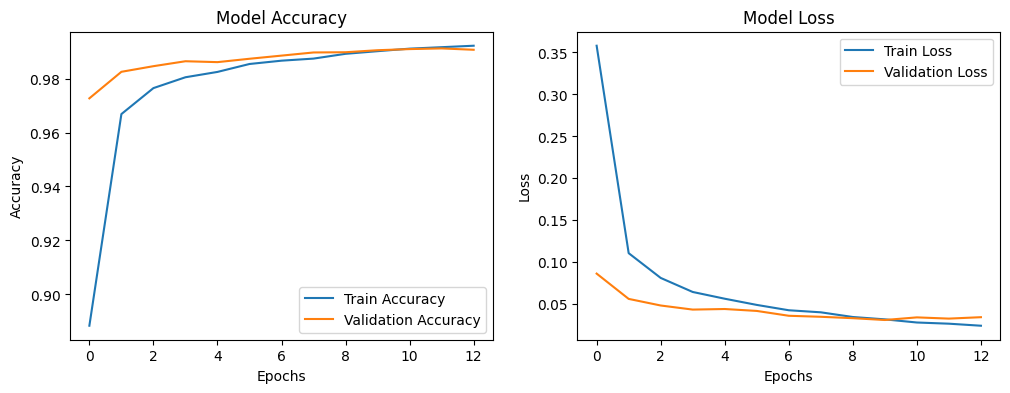

In [ ]:
# Plot akurasi dan loss model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Menyimpan model dalam format SavedModel
model.export('saved_model')

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136838029883024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136838029883200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136838029320688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136838029318576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136838029877216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136838029874400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136838029877040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136838029876336: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Konversi model ke TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Konversi model ke format TFJS
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'tfjs_model')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!pip freeze > requirements.txt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
Predicted class: 5
Actual class: 5


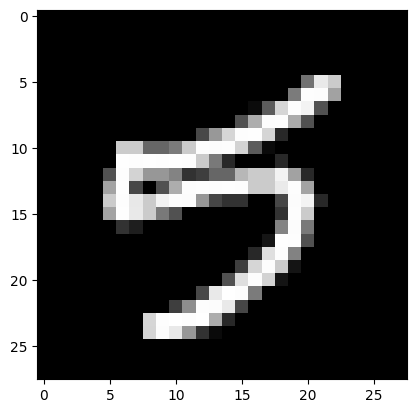

In [ ]:
# Load the saved model
model = tf.keras.models.load_model('best_model.keras')

# Choose a random image from the test set
random_index = np.random.randint(0, len(x_test))
image = x_test[random_index]

# Make a prediction
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(prediction)

# Print the predicted class and the actual class
print(f"Predicted class: {predicted_class}")
print(f"Actual class: {np.argmax(y_test[random_index])}")

# Display the image
plt.imshow(image.squeeze(), cmap='gray')
plt.show()